In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import rcParams as rcP
%matplotlib inline

In [2]:
df=pd.read_csv('Pune_House_Data.csv')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [4]:
df.shape

(13320, 9)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [9]:
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [10]:
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        139
Ambegaon Budruk    139
Anandnagar         139
Aundh              139
Aundh Road         139
                  ... 
Wakadewadi         138
Wanowrie           138
Warje              138
Yerawada           138
other                1
Name: site_location, Length: 97, dtype: int64

In [11]:
df=df.drop('society',axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [12]:
# Data Cleaning
df.isnull().sum()

area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [13]:
from math import floor
balcony_median=float(floor(df.balcony.median()))
bath_median=float(floor(df.bath.median()))

df.balcony=df.balcony.fillna(balcony_median)
df.bath=df.bath.fillna(bath_median)

In [14]:
df.isnull().sum()

area_type         0
availability      0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [15]:
df=df.dropna()
df.isnull().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [16]:
df['bhk']=df['size'].apply(lambda x:int(x.split(' ')[0]))
df=df.drop('size',axis='columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5527
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [17]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True     


In [19]:
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,2.0,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.0,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.0,59.135,Dapodi,2


In [20]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df['new_total_sqft']=df.total_sqft.apply(convert_sqft_to_num)
df=df.drop('total_sqft',axis='columns')
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [22]:
df.isnull().sum()

area_type          0
availability       0
bath               0
balcony            0
price              0
site_location      0
bhk                0
new_total_sqft    46
dtype: int64

In [23]:
df=df.dropna()
df.isnull().sum()

area_type         0
availability      0
bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

In [24]:
# Feature engineering

df1=df.copy()

df1['price_per_sqft']=(df1['price']*100000)/df1['new_total_sqft']
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [25]:
locations=list(df['site_location'].unique())
print(len(locations))

97


In [26]:
df1.site_location=df1.site_location.apply(lambda x: x.strip())

location_stats=df1.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Ambegaon Budruk    139
Chandan Nagar      139
Anandnagar         139
Aundh Road         139
Baner              139
                  ... 
Nagar Road         136
Shivaji Nagar      136
Wakadewadi         136
Warje              136
other                1
Name: site_location, Length: 97, dtype: int64

In [27]:
print(len(location_stats[location_stats<=10]),len(df1.site_location.unique()))

1 97


In [28]:
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [29]:
locations_less_than10=location_stats[location_stats<=10]

df1.site_location=df1.site_location.apply(lambda x:'other' if x in locations_less_than10 else x)
len(df1.site_location.unique())

97

In [30]:
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)


availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
16-Nov               1
15-Dec               1
15-Aug               1
14-Nov               1
17-Jan               1
Name: availability, Length: 80, dtype: int64

In [31]:
dates=df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready=dates[dates<10000]
df1.availability=df1.availability.apply(lambda x:'Not Ready'if x in dates_not_ready else x)

len(df1.availability.unique())

2

In [32]:
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [33]:
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)


area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

In [34]:
# Removing Outliers

df2=df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2),len(df1))

12513 13257


In [35]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.567166
std        4160.879784
min         267.829813
25%        4211.469534
50%        5295.138889
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):

    df_out=pd.DataFrame()

    for key,sub_df in df.groupby('site_location'):
        m=np.mean(sub_df.price_per_sqft)
        sd=np.std(sub_df.price_per_sqft)
        reduce_df=sub_df[(sub_df.price_per_sqft>(m-sd))&(sub_df.price_per_sqft<(m+sd))]
        df_out=pd.concat([df_out, reduce_df],ignore_index=  True)
    return df_out


df3=remove_pps_outliers(df2) 
print(len(df2),len(df3))   

12513 10937


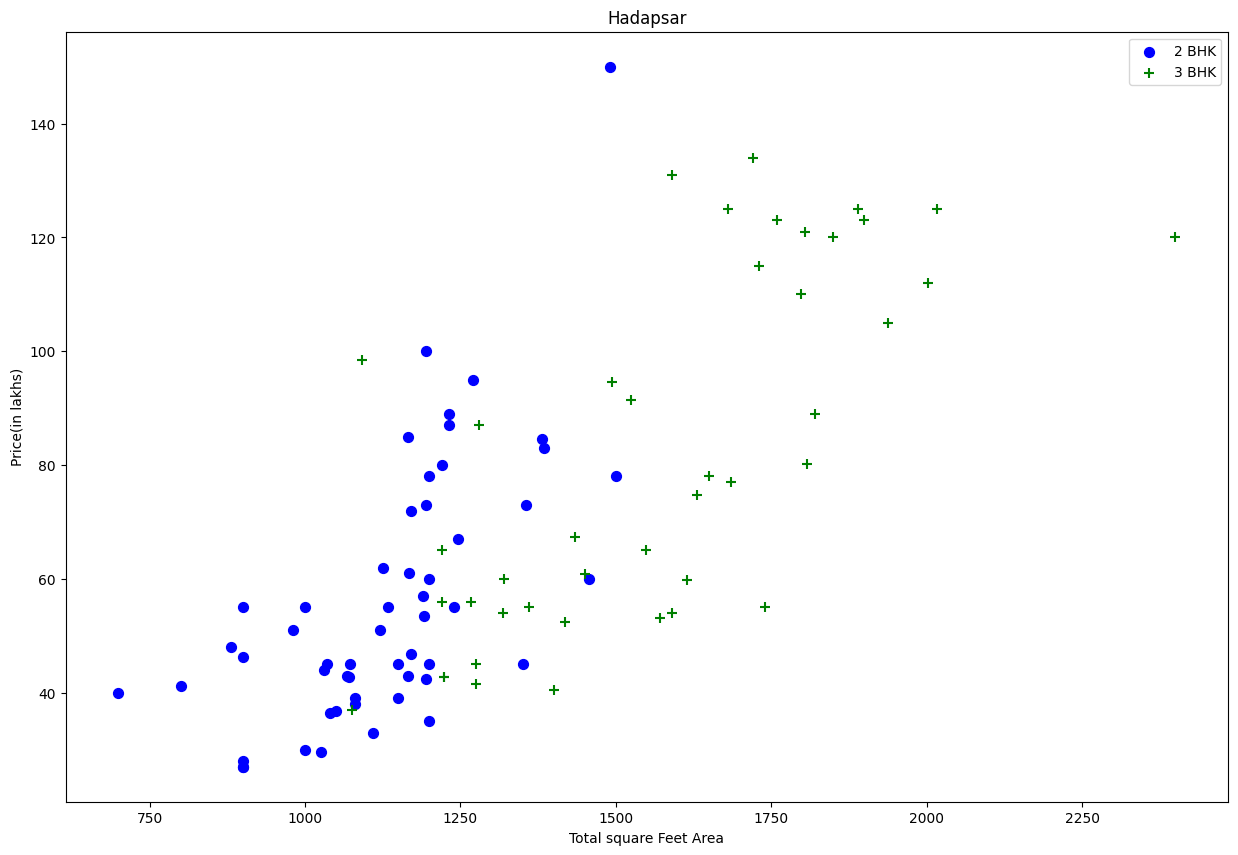

In [37]:
def plot_scatter_chart(df,site_location):
    bhk2=df[(df.site_location==site_location)&(df.bhk==2)]
    bhk3=df[(df.site_location==site_location)&(df.bhk==3)]
    rcP['figure.figsize']=(15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total square Feet Area')
    plt.ylabel('Price(in lakhs)')
    plt.title(site_location)
    plt.legend()

plot_scatter_chart(df3,'Hadapsar')    

In [38]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for site_location,site_location_df in df.groupby('site_location'):
        bhk_stats={}

        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in site_location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices,axis='index')


df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))                


10937 7459


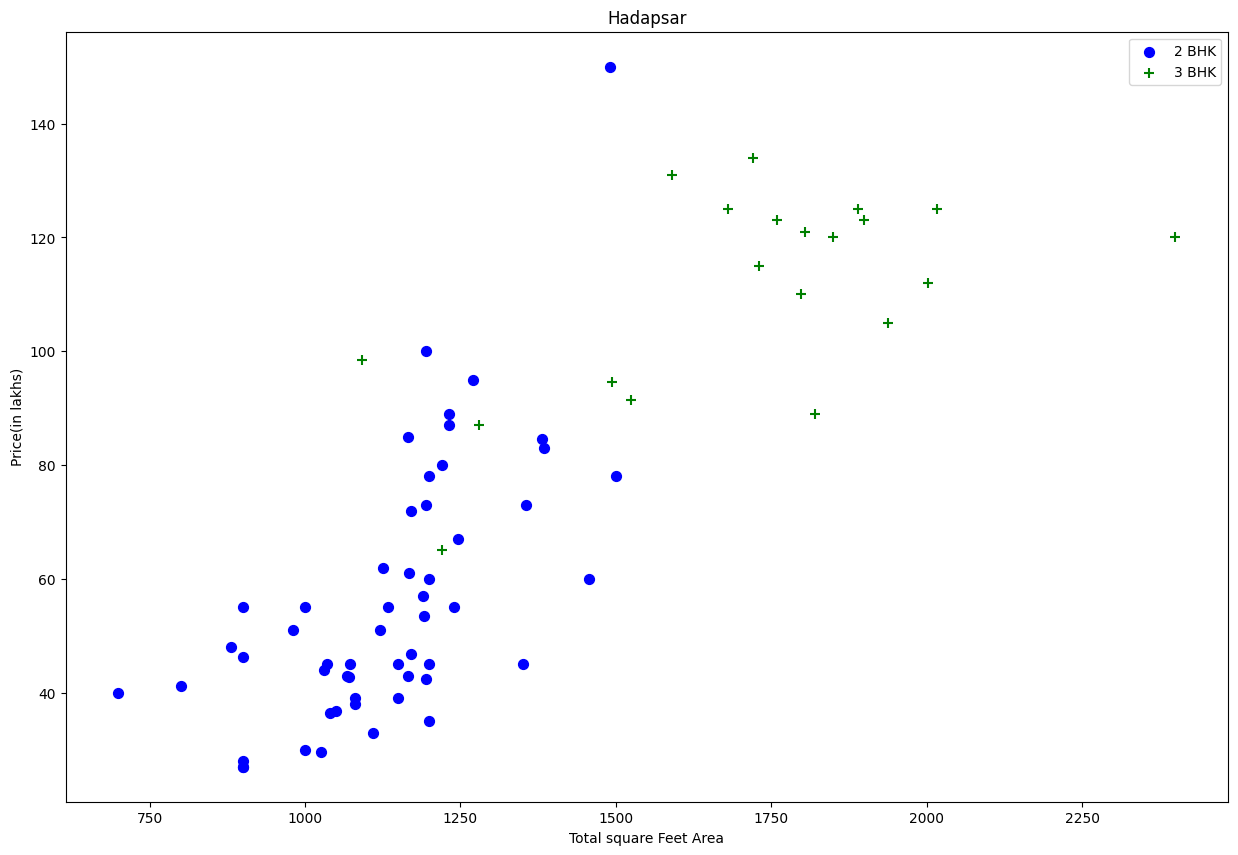

In [39]:
plot_scatter_chart(df4,'Hadapsar')

Text(0, 0.5, 'Count')

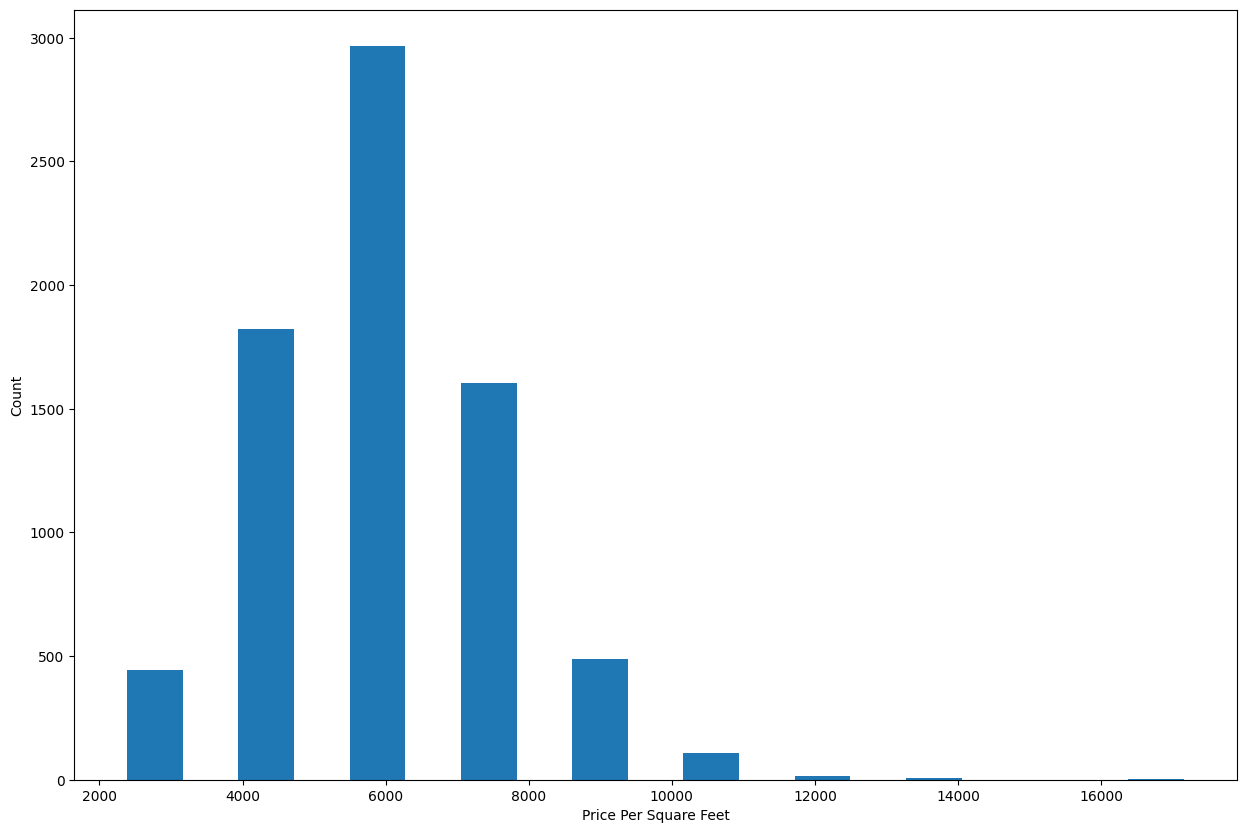

In [40]:
plt.hist(df4.price_per_sqft,rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

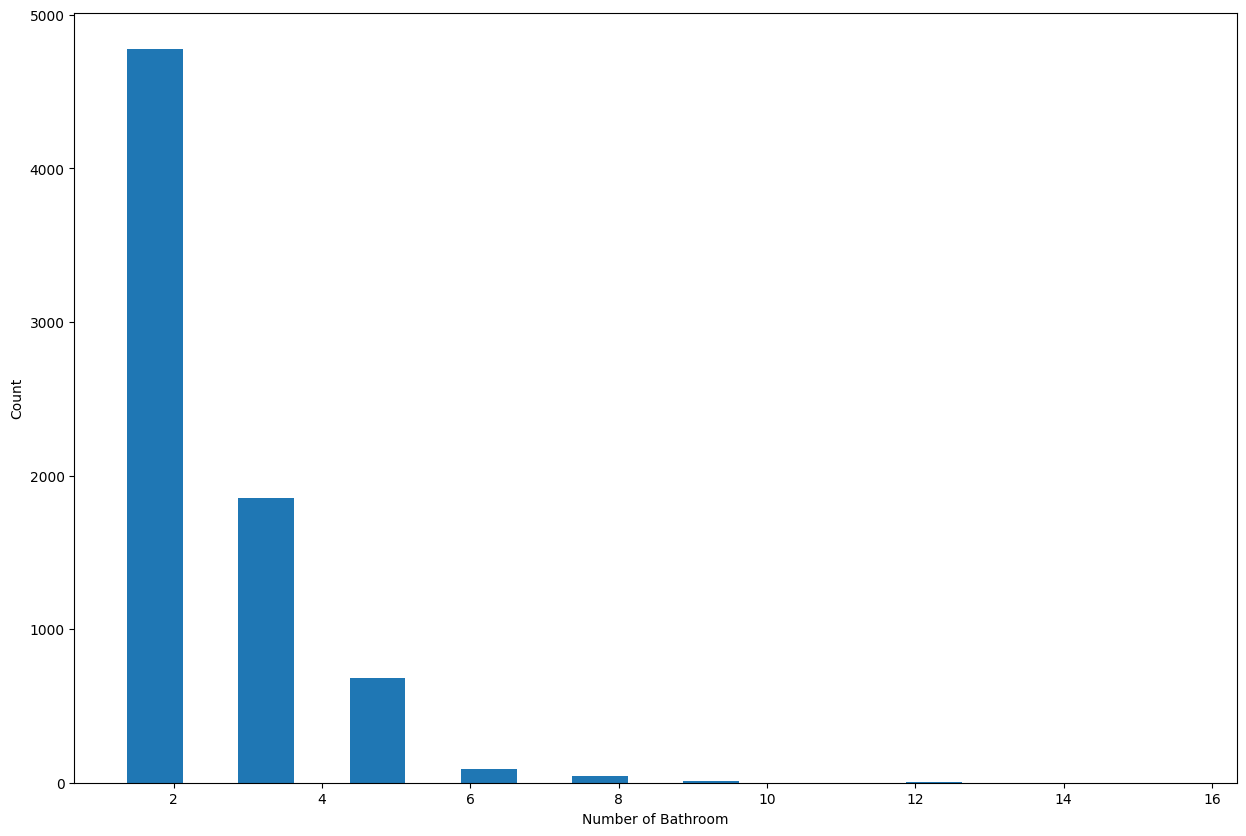

In [41]:
plt.hist(df4.bath,rwidth=0.5)
plt.xlabel("Number of Bathroom")
plt.ylabel('Count')

In [42]:
df5=df4[df4.bath<(df4.bhk+2)]
print(len(df4),len(df5))

7459 7395


In [43]:
df5.tail()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
10923,Super built-up Area,Not Ready,2.0,1.0,67.0,Yerawada,2,1165.0,5751.072961
10928,Built-up Area,Ready To Move,6.0,2.0,115.0,Yerawada,6,3500.0,3285.714286
10931,Built-up Area,Not Ready,2.0,2.0,353.0,Yerawada,5,3210.0,10996.884735
10932,Super built-up Area,Ready To Move,2.0,2.0,54.0,Yerawada,2,1050.0,5142.857143
10936,Super built-up Area,Not Ready,2.0,1.0,70.0,Yerawada,2,1132.0,6183.745583


In [44]:
#Modeling Buliding

df6=df5.copy()
df6=df6.drop('price_per_sqft',axis='columns')

In [45]:
df6.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,4.0,1.0,245.00,Alandi Road,4,2894.0
2,Super built-up Area,Ready To Move,2.0,2.0,50.00,Alandi Road,2,1084.0
3,Super built-up Area,Ready To Move,2.0,2.0,80.00,Alandi Road,2,1230.0
4,Super built-up Area,Ready To Move,3.0,2.0,130.00,Alandi Road,3,1750.0


In [46]:
dummy_cols=pd.get_dummies(df6.site_location)
df6=pd.concat([df6,dummy_cols],axis='columns')

In [47]:
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area',axis='columns')
df6=pd.concat([df6,dummy_cols],axis='columns')

In [48]:
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [49]:
df6.drop(['area_type','availability','site_location'],axis='columns',inplace=True)
df6.head(10)

,bath,balcony,price,bhk,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,Built-up Area,Carpet Area,Plot Area,Ready To Move
0,2.0,1.0,39.07,2,1056.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,1.0,245.00,4,2894.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,2.0,2.0,50.00,2,1084.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2.0,2.0,80.00,2,1230.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.0,2.0,130.00,3,1750.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2.0,1.0,41.00,2,995.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8,2.0,1.0,95.00,2,1360.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,2.0,2.0,50.00,2,1040.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
10,3.0,2.0,86.06,3,1655.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12,5.0,3.0,198.00,4,2790.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df6.shape

(7395, 105)

In [51]:
X=df6.drop('price',axis='columns')
y=df6['price']

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [53]:
def find_best_model(X,y):
    models={
        'linear_regression':{
            'model': LinearRegression(),
            'parameters':{
                
            }
        },
        'lasso':{
            'model': Lasso(),
            'parameters':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'parameters':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }

    scores=[]
    cv_X_y=ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'], model_params['parameters'],cv=cv_X_y,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':model_name,
            'best_parameters':gs.best_params_,
            'accuracy': gs.best_score_
        })

    return pd.DataFrame(scores,columns=['model','best_parameters','accuracy']) 

find_best_model(X,y)     

c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_parameters,accuracy
0,linear_regression,{},0.835449
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.829264
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.775738


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [55]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
model.score(X_test,y_test)

0.8180571987758952

In [57]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada', 'Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Ready To Move'],
      dtype='object', length=104)

In [58]:
np.where(X.columns=='Balaji Nagar')[0][0]

np.int64(9)

In [59]:
np.where(X.columns=='Built-up  Area')[0][0]

np.int64(100)

In [60]:
np.where(X.columns=='Ready To Move')[0][0]

np.int64(103)

In [61]:
def prediction(location,bhk,bath,balcony,sqft,area_type,availability):
    loc_index,area_index,avail_index=-1,-1,-1

    if location!='other':
        loc_index=int(np.where(X.columns==location)[0][0])

    if area_type!=' Super Built-up Area':
        area_index=np.where(X.columns==area_type)[0][0]

    if availability!='Not Ready':
        vail_index=np.where(X.columns==availability)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=bath
    x[1]=balcony
    x[2]=bhk
    x[3]=sqft

    if loc_index>=0:
        x[loc_index]=1
    if area_index>=0:
        x[area_index]=1
    if avail_index>=0:
        x[avail_index]=1

    return model.predict([x])[0]            

In [62]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('Balaji Nagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(53.176102678938705)

In [63]:
prediction('Hadapsar',2,2,2,1000,'Built-up  Area','Ready To Move')

c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(52.33077533654276)

In [64]:
prediction('Camp',2,3,2,2000,'Plot  Area','Not Ready')

c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(140.18213495419343)

In [65]:
prediction('Baner',2,3,2,2000,'Plot  Area','Not Ready')

c:\Users\kanim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(140.23864441106997)

In [66]:
import pickle

# Assuming X.columns is a list of all column names in your dataset
locations_list = [col.capitalize() for col in ['aundh', 'baner', 'kothrud', 'wakad', 'hinjewadi', 'pimple_saudagar']]  # Replace with your actual locations
area_types_list = [col.capitalize() for col in ['built_up_area', 'carpet_area', 'plot_area', 'super_built_up_area']]
availability_list = [col.capitalize() for col in ['ready_to_move', 'under_construction', 'not_ready']]

# Generate the dictionary for columns.pkl
data_columns = {
    'data_columns': X.columns.tolist(),  # List of all column names from your model
    'locations': locations_list,         # Dynamically extracted or manually defined
    'area_types': area_types_list,
    'availabilities': availability_list
}

# Save the dictionary to a pickle file
with open('columns.pkl', 'wb') as columns_file:
    pickle.dump(data_columns, columns_file)
print("columns.pkl has been created successfully!")
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved as model.pkl")

columns.pkl has been created successfully!
Model saved as model.pkl


In [67]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
        
    if availability!='Not Ready':        
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
        
    return model.predict([x])[0]